# Making WordClouds

***Entry format:***  *as-you-go*

## Notebook setup

Define some variables

In [8]:
import os
outdir = os.getcwd() + '/nb_outputs/making_wordclouds'
if not os.path.isdir(outdir): os.makedirs(outdir)

Importage

In [43]:
# Generic imports

import os,sys,glob,h5py,itertools,multiprocessing,\
       numpy as np,pandas as pd

# Visualization stuff

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display as d

# PDF parsing and wordcloud stuff

import PyPDF2
from wordcloud import WordCloud

Install some libraries if needed

```bash
!pip install PyPDF2
!pip install seaborn
!pip install wordcloud
```

Go to output folder

In [11]:
os.chdir(outdir)

Ok, let's get cracking...

## Test run

Test run on some papers from a friend on recovery in conversation. 

In [42]:
pdfs_list = glob.glob('../../../files/recovery_papers_for_word_cloud/*.pdf')
def get_text(fname):
    pdf = PyPDF2.PdfFileReader(open(fname, "rb"))
    text = ' '.join([page.extractText().replace('\n', ' ') for page in pdf.pages])
    return text  
texts = {p: get_text(p) for p in pdfs_list}
all_texts = ' '.join(texts.values())

Here are some snippets from each paper. Some have clearly not parsed very well...


In [45]:
for k,v in texts.items():
  print('\n\n\nPaper: %s\n\n' %k)
  print(v[:1000])




Paper: ../../../files/recovery_papers_for_word_cloud/1-s2.0-S0006320714000925-main.pdf


PerspectiveRe-deﬁningrecovery:Ageneralizedframeworkforassessingspecies recoveryAlanaWestwood ,EmilieReuchlin-Hugenholtz,DavidM.Keith DepartmentofBiology,DalhousieUniversityHalifax,NovaScotiaB3H4R2,Canada articleinfo Articlehistory: Received2October2013  Receivedinrevisedform13January2014  Accepted22February2014  Availableonline22March2014 Keywords: Conservation ProtectionEndangeredspecies Recovery Speciesatrisk  PolicyabstractAtpresent,theconceptsof‘recovery’and‘recoveredstate’arepoorlydeﬁnedandoftenconfusedwithin academicliteratureandlegislation.Thesedeﬁnitionalinconsistenciesresultinglobaladhocattemptsat recoveryandrecoveryplansthattypicallyexhibitlowsuccessrates,andwhoseoutcomesaredifﬁcultto  evaluate.Thereisadireneedforaninternationallyacceptedframeworktoguidethedevelopmentof plansfortherecoveryofpopulations,species,andecosystems.Suchaframeworkmustdistinguish betweentheprocessofrecoveryandth

Generate wordclouds

In [46]:
wordclouds = {k:  WordCloud(max_font_size=40).generate(v) for k,v in texts.items()}

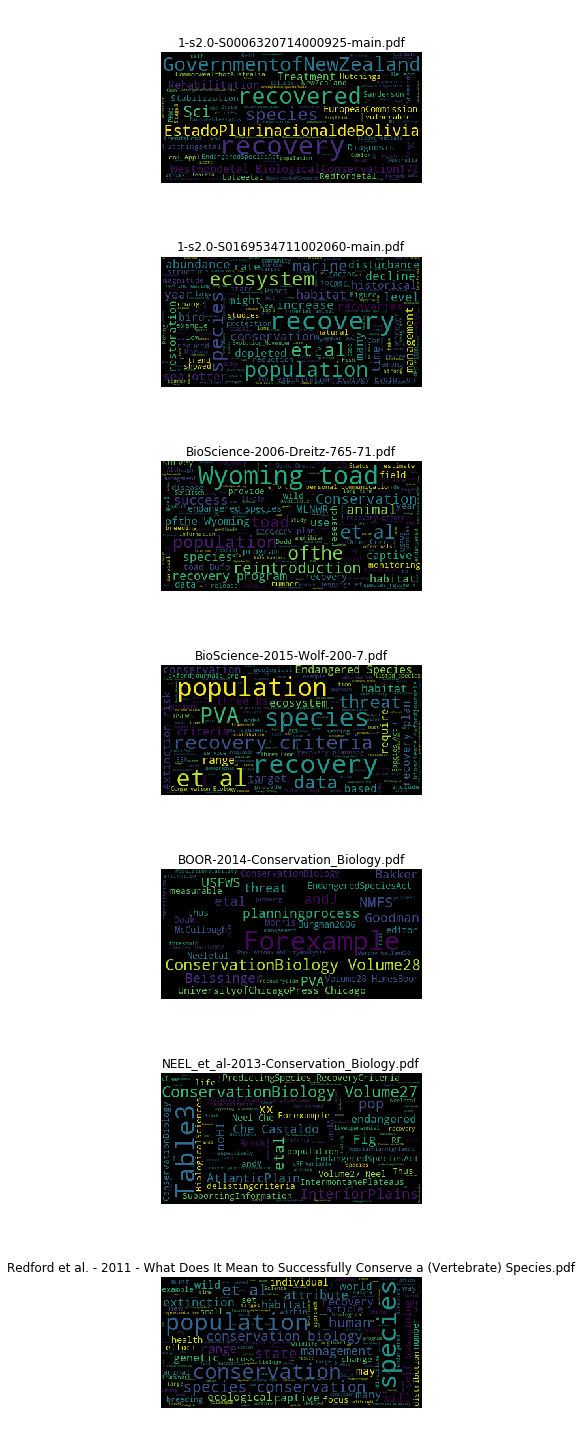

In [48]:
figf = outdir + '/recovery_wordcloud_test.png'

fig, ax = plt.subplots(ncols=1,nrows=len(wordclouds), figsize=(12,20))

for wc_it,(paper_name,wc_image) in enumerate(wordclouds.items()):

  a = ax[wc_it]
    
  a.imshow(wc_image)
  a.axis('off')
  a.set_title('\n\n' + os.path.split(paper_name)[-1])

    
plt.tight_layout()

plt.savefig(figf, bbox_inches='tight')

Combined wordcloud from all papers:


In [49]:
all_wordcloud = WordCloud(max_font_size=40).generate(all_texts)

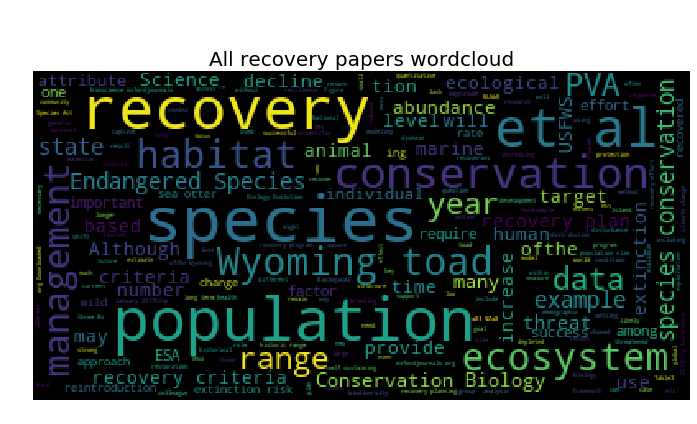

In [51]:
figf = outdir + '/recovery_allwordcloud_test.png'

fig, ax = plt.subplots(figsize=(12,6))

ax.imshow(all_wordcloud)
ax.axis('off')

ax.set_title('\n\nAll recovery papers wordcloud',
             fontdict={'fontsize': 20})
    
plt.tight_layout()

plt.savefig(figf, bbox_inches='tight')
#plt.close()